# Simple Neural Network Music Genre Classification:

This notebook is dedicated to improving the test accuracy of the network presented in:
https://www.kaggle.com/code/aasimahmed04/music-genre-classifier

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MaxAbsScaler
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa, IPython
import librosa.display as lplt

from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from keras import regularizers

import IPython.display as ipd
from IPython.display import Audio

## 1. Load And Arrange The Data

The data set is included a .csv file with the extracted features:

In [2]:
df = pd.read_csv('features_30_sec.csv')

#### Check If The Data Is Balanced:

Class Balance:

In [3]:
df.label.value_counts().reset_index()

,label,count
0,blues,100
1,classical,100
2,country,100
3,disco,100
4,hiphop,100
5,jazz,100
6,metal,100
7,pop,100
8,reggae,100
9,rock,100


We have exactly 100 samples out of each class.

In [4]:
data = df.iloc[:,1:59];
labels_str = df['label'];

Map labels to numbers:

In [5]:
map_ = {
    "blues"     : 0,
    "classical" : 1,
    "country"   : 2,
    "disco"     : 3,
    "hiphop"    : 4,
    "jazz"      : 5,
    "metal"     : 6,
    "pop"       : 7,
    "reggae"    : 8,
    "rock"      : 9,
}

In [6]:
labels = np.array([map_[label_] for label_ in labels_str])

## 2. Pre-Processing:

Scale the data to prevent feature imbalances:

In [7]:
data_scaler = MaxAbsScaler().fit(data);

In [8]:
scaled_data = data_scaler.transform(data);

Convert to float64 for better computation:

In [9]:
scaled_data.astype('float64', casting = 'same_kind');

Split the data to train and test:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels, test_size=0.15,shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,shuffle=True, random_state=1)

In [11]:
print("Train data size: ", X_train.shape);
print("Validation data size: ",X_val.shape);
print("Test data size: ", X_test.shape);

Train data size:  (680, 58)
Validation data size:  (170, 58)
Test data size:  (150, 58)


## 4. Defining The Network:

In [12]:
#Creating a Neural Network
model = Sequential() 
  
model.add(Flatten(input_shape=(58,))) 
model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3))  
model.add(Dense(10, activation='softmax')) 

model.summary()

C:\Users\420\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 58)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          15,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

Compiling and fitting:

In [13]:
#Compiling & Fitting the Model
adam = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data= (X_test, y_test),
                epochs=100,
                batch_size=32)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1510 - loss: 2.5570 - val_accuracy: 0.1733 - val_loss: 2.2871
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2177 - loss: 2.3124 - val_accuracy: 0.2067 - val_loss: 2.2572
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3244 - loss: 2.0058 - val_accuracy: 0.2400 - val_loss: 2.2242
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3508 - loss: 1.8552 - val_accuracy: 0.2867 - val_loss: 2.1897
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3575 - loss: 1.7887 - val_accuracy: 0.3267 - val_loss: 2.1540
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4592 - loss: 1.5973 - val_accuracy: 0.3933 - val_loss: 2.1149
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4771 - loss: 1.5571 - val_accuracy: 0.4200 - val_loss: 2.0738
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4809 - loss: 1.4911 - val_accuracy: 0.4733 - 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8463 - loss: 0.5932 - val_accuracy: 0.6933 - val_loss: 0.9337
Epoch 52/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8255 - loss: 0.5474 - val_accuracy: 0.7000 - val_loss: 0.9328
Epoch 53/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8346 - loss: 0.5749 - val_accuracy: 0.7067 - val_loss: 0.9413
Epoch 54/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8034 - loss: 0.5888 - val_accuracy: 0.7067 - val_loss: 0.9412
Epoch 55/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8069 - loss: 0.5925 - val_accuracy: 0.7067 - val_loss: 0.9188
Epoch 56/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8391 - loss: 0.5336 - val_accuracy: 0.7000 - val_loss: 0.9037
Epoch 57/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8312 - loss: 0.5167 - val_accuracy: 0.7067 - val_loss: 0.9126
Epoch 58/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8476 - loss: 0.5219 - val_accuracy: 0.7200 - val_lo

Test set:

In [14]:
y_predict = np.argmax(model.predict(X_test),axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [15]:
#Test Accuracy
acc = np.mean(y_predict == y_test)*100
print("test accuracy = %.2f"%acc, "%");

test accuracy = 72.00 %


Plot original scores:

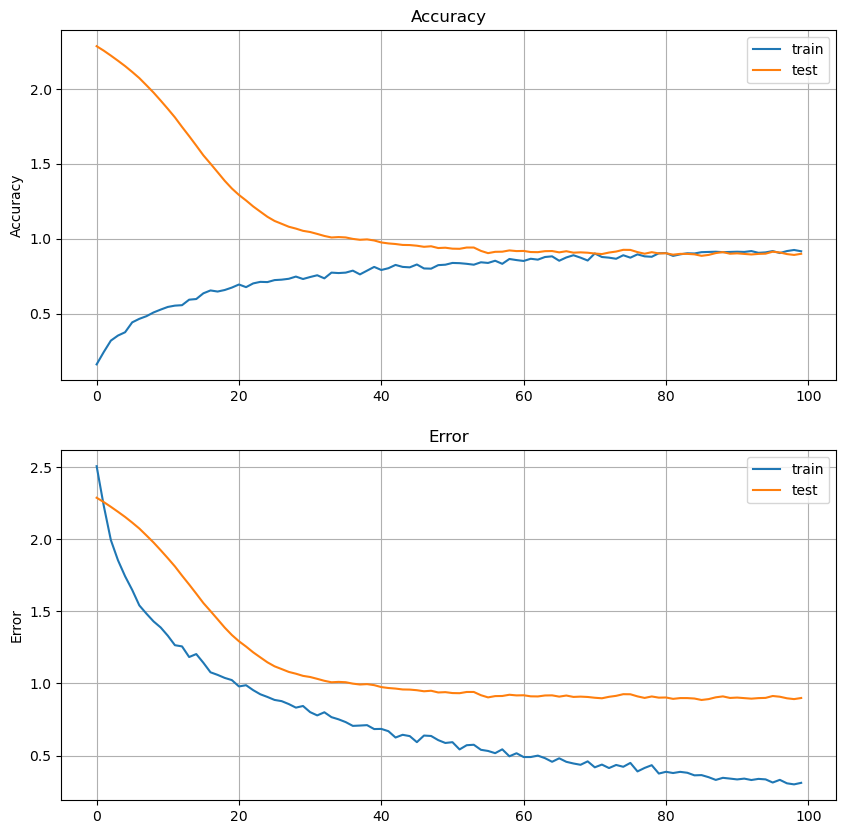

In [16]:
fig, axs = plt.subplots(2, figsize=(10, 10))

#Accuracy
axs[0].plot(hist.history['accuracy'], label="train")
axs[0].plot(hist.history['val_loss'], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")
axs[0].grid()

#Error
axs[1].plot(hist.history["loss"], label="train") 
axs[1].plot(hist.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
axs[1].grid()  
    
plt.show()

# Improving The Network:

In [17]:
#Creating a Neural Network
model = Sequential() 
  
model.add(Flatten(input_shape=(58,))) 
model.add(Dense(256,kernel_regularizer=regularizers.l1(0.0005), activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dense(128,kernel_regularizer=regularizers.l1(0.0005), activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(10, activation='softmax')) 

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 58)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          15,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

In [18]:
#Compiling & Fitting the Model
adam = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data= (X_test, y_test),
                epochs=100,
                batch_size=32)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0881 - loss: 4.2349 - val_accuracy: 0.1267 - val_loss: 3.8160
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1917 - loss: 3.8261 - val_accuracy: 0.2267 - val_loss: 3.7820
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2847 - loss: 3.6096 - val_accuracy: 0.2933 - val_loss: 3.7466
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3384 - loss: 3.3987 - val_accuracy: 0.3467 - val_loss: 3.7084
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4011 - loss: 3.2608 - val_accuracy: 0.3800 - val_loss: 3.6664
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4268 - loss: 3.1709 - val_accuracy: 0.3933 - val_loss: 3.6237
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4720 - loss: 3.0673 - val_accuracy: 0.4200 - val_loss: 3.5762
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5058 - loss: 2.9413 - val_accuracy: 0.4867 - 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8019 - loss: 1.9237 - val_accuracy: 0.7267 - val_loss: 2.2006
Epoch 52/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8043 - loss: 1.9501 - val_accuracy: 0.7533 - val_loss: 2.1962
Epoch 53/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8234 - loss: 1.8886 - val_accuracy: 0.7467 - val_loss: 2.1914
Epoch 54/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8160 - loss: 1.8916 - val_accuracy: 0.7467 - val_loss: 2.1872
Epoch 55/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8450 - loss: 1.8818 - val_accuracy: 0.7333 - val_loss: 2.1822
Epoch 56/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8405 - loss: 1.8460 - val_accuracy: 0.7400 - val_loss: 2.1785
Epoch 57/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8504 - loss: 1.8239 - val_accuracy: 0.7400 - val_loss: 2.1674
Epoch 58/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8445 - loss: 1.8454 - val_accuracy: 0.7333 - val_lo

Test set:

In [19]:
y_predict = np.argmax(model.predict(X_test),axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [20]:
#Test Accuracy
acc = np.mean(y_predict == y_test)*100
print("test accuracy = %.2f"%acc, "%");

test accuracy = 76.67 %


Plot scores:

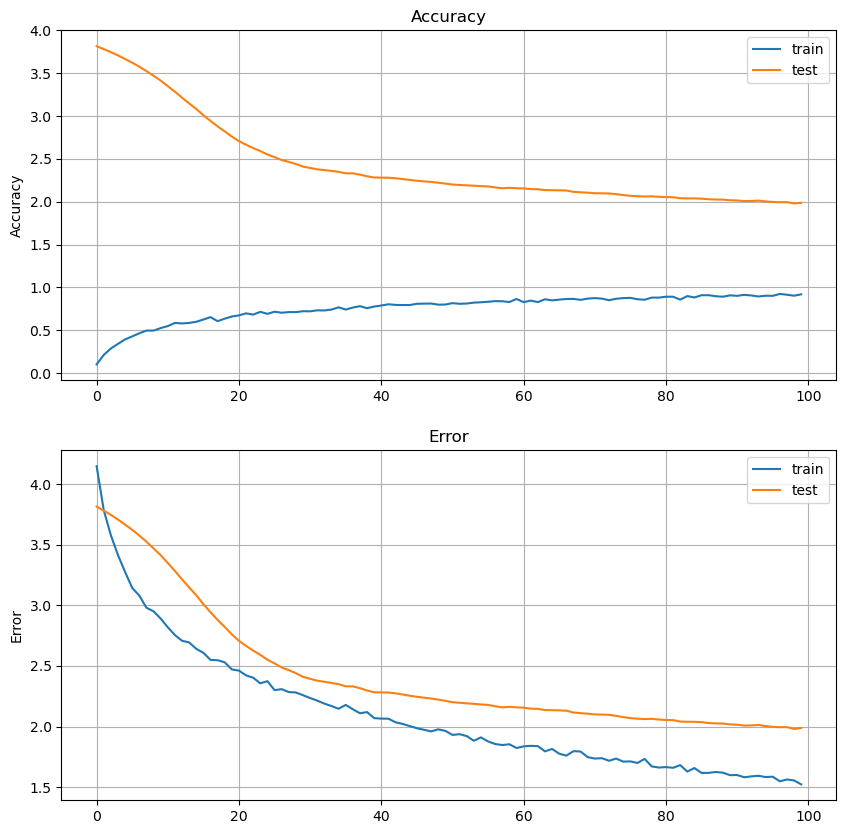

In [21]:
fig, axs = plt.subplots(2, figsize=(10, 10))

#Accuracy
axs[0].plot(hist.history['accuracy'], label="train")
axs[0].plot(hist.history['val_loss'], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")
axs[0].grid()

#Error
axs[1].plot(hist.history["loss"], label="train") 
axs[1].plot(hist.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
axs[1].grid()

plt.show()

#### Confusion Matrix

In [22]:
cm = confusion_matrix(y_test, y_predict);

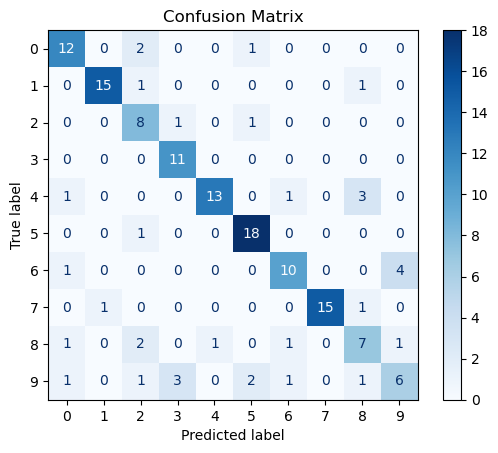

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")

plt.title('Confusion Matrix')
plt.show()